In [22]:
import torch
import torchaudio
import torchaudio.functional as F
import torchaudio.transforms as T
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Audio

print(f"PyTorch Version: {torch.__version__}")
print(f"Torchaudio Version: {torchaudio.__version__}")

PyTorch Version: 2.8.0+cu126
Torchaudio Version: 2.8.0+cu126


In [20]:

from google.colab import files
import torchaudio

# 여러 파일 업로드 (창에서 4개 파일 모두 선택 가능)
uploaded = files.upload()

# 불러올 파일 리스트
AUDIO_FILES = [
    "095522039.m4a",
    "095522040.m4a",
    "095522041.m4a",
    "095522042.m4a"
]

# 오디오 데이터를 저장할 딕셔너리
audio_data = {}

# 파일들 불러오기
for file_path in AUDIO_FILES:
    try:
        waveform, sample_rate = torchaudio.load(file_path)
        audio_data[file_path] = {
            "waveform": waveform,
            "sample_rate": sample_rate
        }
        print(f"Successfully loaded {file_path} "
              f"(waveform shape: {waveform.shape}, sample_rate: {sample_rate})")
    except Exception as e:
        print(f"Error loading {file_path}: {e}")


Saving 095522039.m4a to 095522039 (1).m4a
Saving 095522040.m4a to 095522040 (2).m4a
Saving 095522041.m4a to 095522041 (1).m4a
Saving 095522042.m4a to 095522042.m4a
Successfully loaded 095522039.m4a (waveform shape: torch.Size([1, 177152]), sample_rate: 44100)
Successfully loaded 095522040.m4a (waveform shape: torch.Size([1, 177152]), sample_rate: 44100)
Successfully loaded 095522041.m4a (waveform shape: torch.Size([1, 177152]), sample_rate: 44100)
Successfully loaded 095522042.m4a (waveform shape: torch.Size([1, 177152]), sample_rate: 44100)


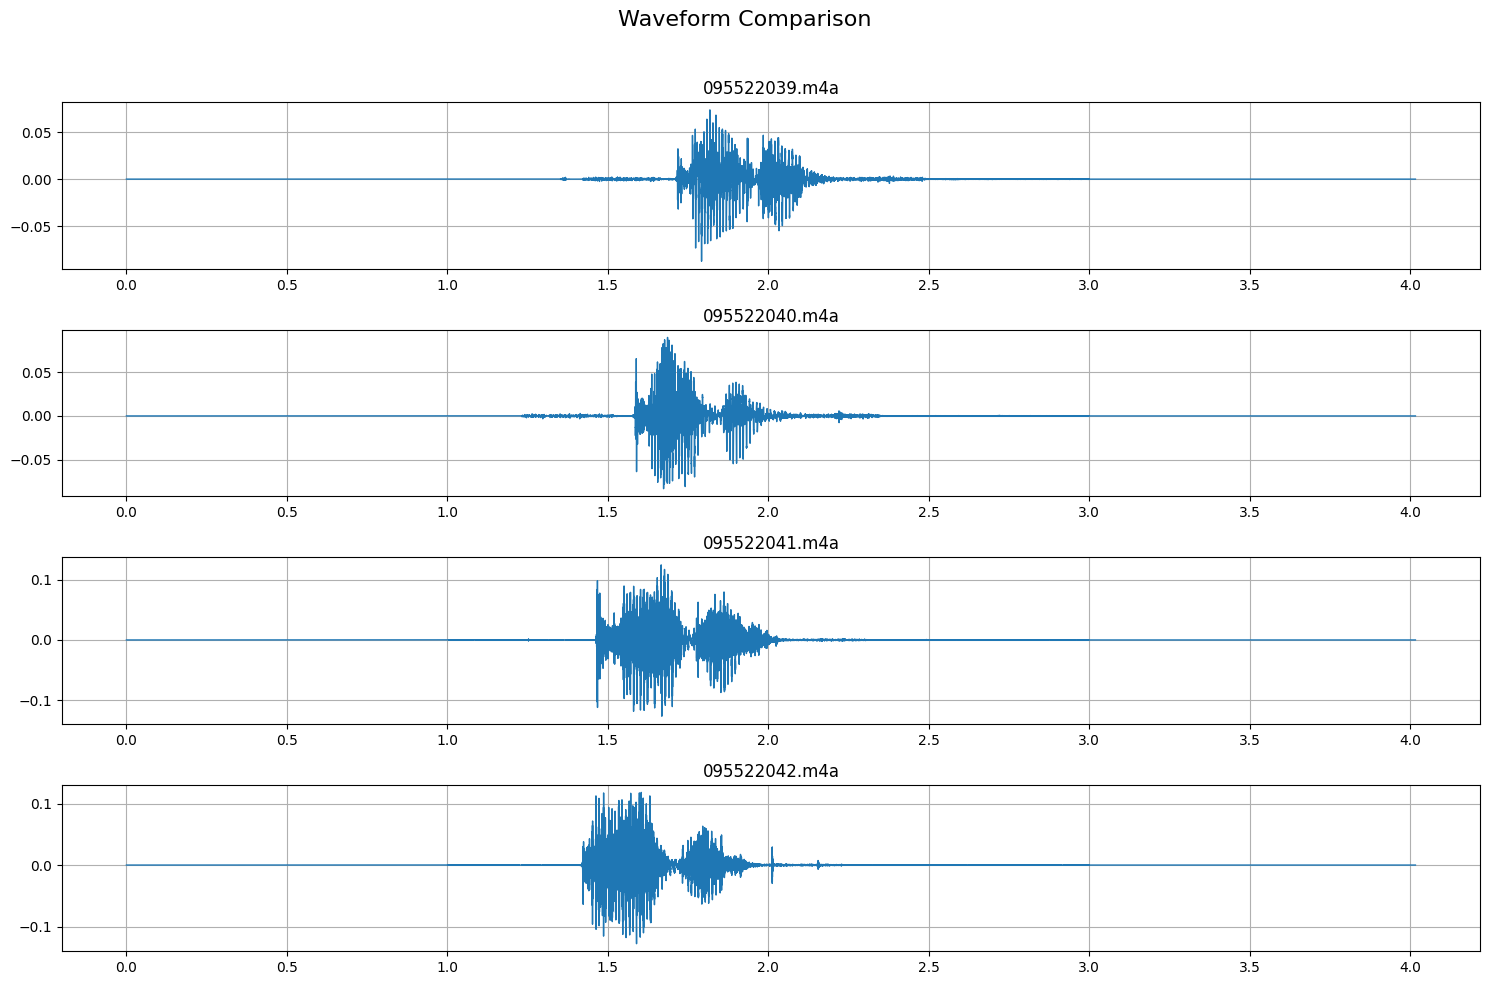

In [23]:
fig, axes = plt.subplots(len(AUDIO_FILES), 1, figsize=(15, 10))
fig.suptitle('Waveform Comparison', fontsize=16)

for i, file_path in enumerate(AUDIO_FILES):
    if file_path in audio_data:
        data = audio_data[file_path]
        waveform = data["waveform"].numpy()
        sample_rate = data["sample_rate"]
        num_channels, num_frames = waveform.shape
        time_axis = np.arange(0, num_frames) / sample_rate

        ax = axes[i]
        ax.plot(time_axis, waveform[0], linewidth=1) # Plot first channel
        ax.set_title(file_path)
        ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

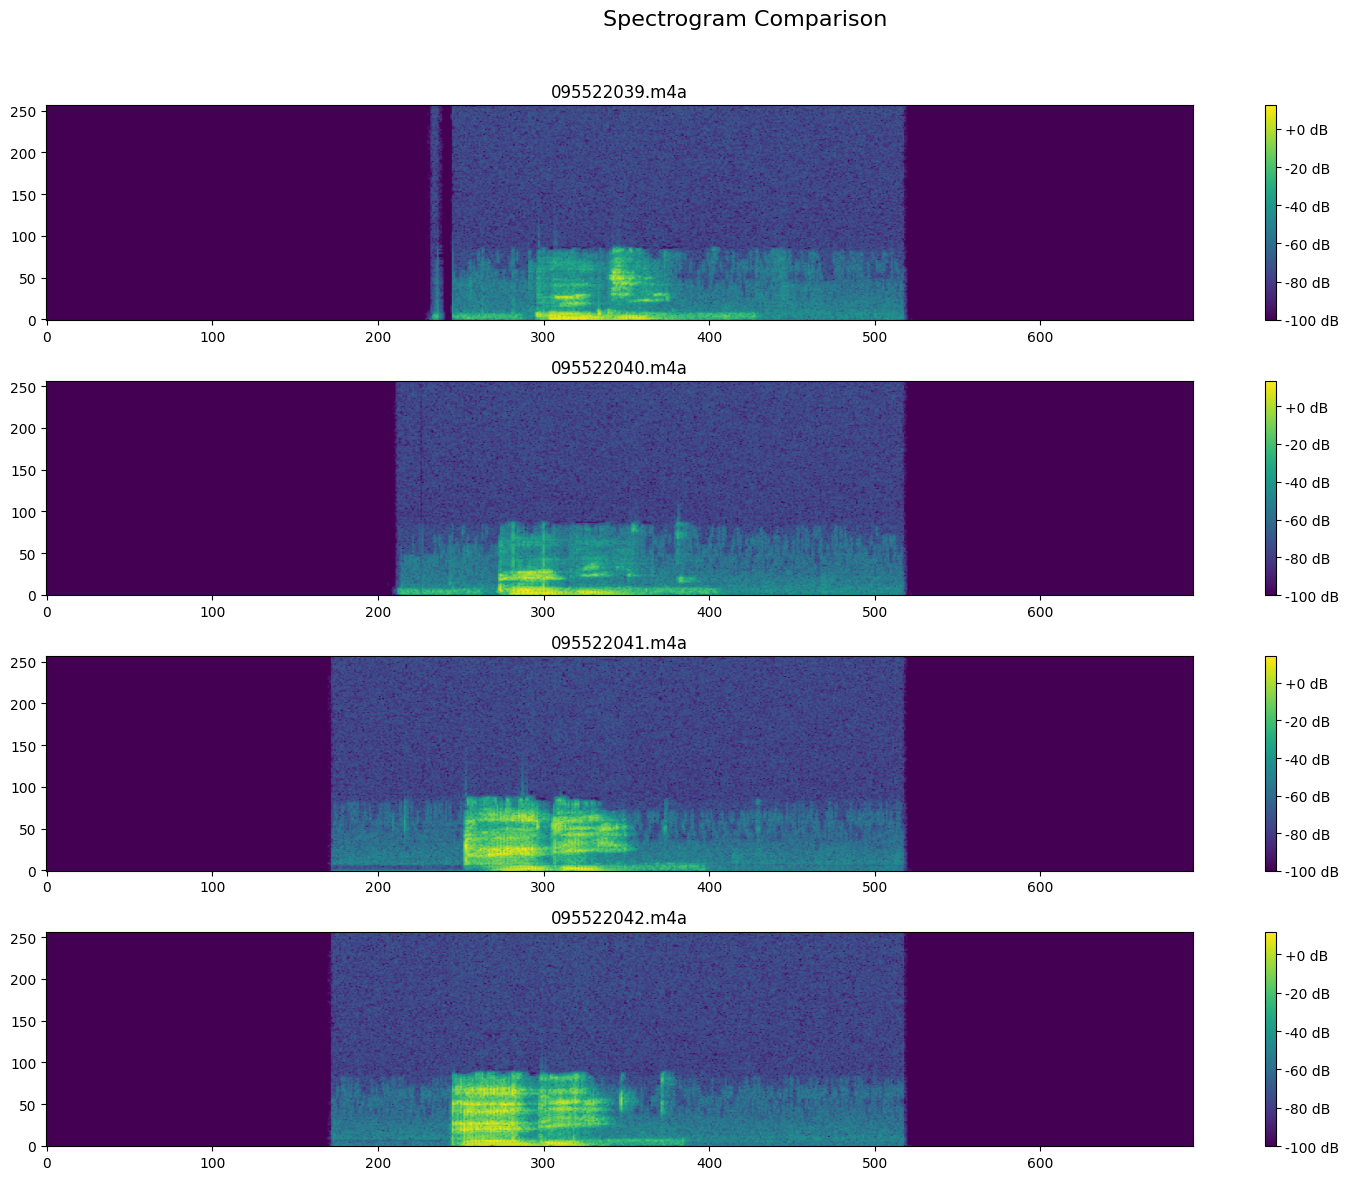

In [25]:
fig, axes = plt.subplots(len(AUDIO_FILES), 1, figsize=(15, 12))
fig.suptitle('Spectrogram Comparison', fontsize=16)

for i, file_path in enumerate(AUDIO_FILES):
    if file_path in audio_data:
        data = audio_data[file_path]
        waveform = data["waveform"]

        spectrogram = T.Spectrogram(n_fft=512)(waveform)
        spec_db = torchaudio.functional.amplitude_to_DB(spectrogram, multiplier=10, amin=1e-10, db_multiplier=0)

        ax = axes[i]
        im = ax.imshow(spec_db.squeeze(0).numpy(), origin="lower", aspect="auto")
        ax.set_title(file_path)
        fig.colorbar(im, ax=ax, format='%+2.0f dB')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

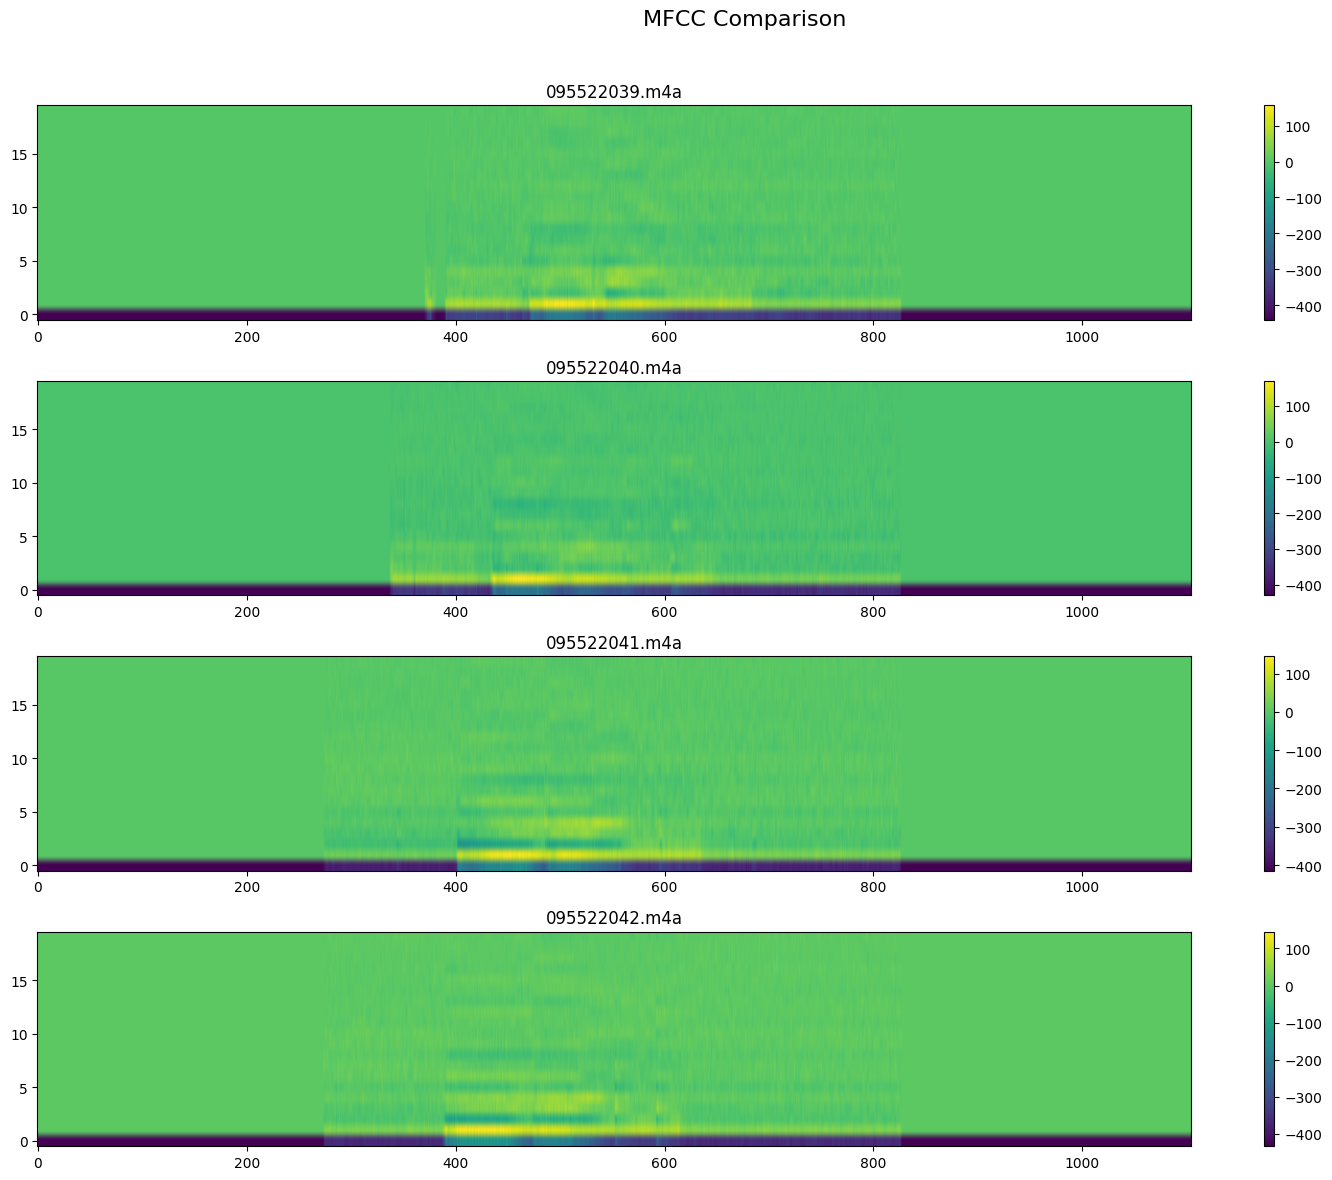

In [26]:
fig, axes = plt.subplots(len(AUDIO_FILES), 1, figsize=(15, 12))
fig.suptitle('MFCC Comparison', fontsize=16)

for i, file_path in enumerate(AUDIO_FILES):
    if file_path in audio_data:
        data = audio_data[file_path]
        waveform = data["waveform"]
        sample_rate = data["sample_rate"]

        mfcc_transform = T.MFCC(
            sample_rate=sample_rate,
            n_mfcc=20,
            melkwargs={"n_fft": 400, "hop_length": 160, "n_mels": 40, "center": False}
        )
        mfcc = mfcc_transform(waveform)

        ax = axes[i]
        im = ax.imshow(mfcc.squeeze(0).detach().numpy(), aspect='auto', origin='lower')
        ax.set_title(file_path)
        fig.colorbar(im, ax=ax)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()